In [1]:
# computational imports
import xarray as xr
import numpy as np
import zarr
import scipy as sc
import clouddrift
import dask
from dask.distributed import Client, LocalCluster
from scipy import stats

In [2]:
# plotting imports
import matplotlib.pyplot as plt

In [3]:
#dask.config.get("distributed.scheduler.worker-saturation")
dask.config.set({"distributed.scheduler.worker-saturation":1.0})
cluster = LocalCluster()
client = Client(cluster)

In [4]:
cluster

LocalCluster(8bd78fcd, 'tcp://127.0.0.1:36669', workers=16, threads=160, memory=283.06 GiB)

In [15]:
cluster.close()

In [5]:
# list used for for-loops
list11 = np.linspace(1, 11, 11)

In [9]:
# open year-long eulerian spectra datasets
eul_0m = xr.open_dataset('/projectnb/msldrift/tidaldrift/faigle/eul_spec_0m/avg_eul_spec_year.nc', chunks = 'auto')
eul_15m = xr.open_dataset('//projectnb/msldrift/tidaldrift/faigle/eul_spec_15m/avg_eul_spec_year_15m.nc', chunks = 'auto')

In [12]:
# open year-long lagrangian spectra dataset
lag_0m = xr.open_dataset('/home/exf512/data/avg_spectra_deep_fast/0m/year_avg_spectra_0m.nc', 
                                   chunks = {'obs':1440})
lag_15m = xr.open_dataset('/home/exf512/data/avg_spectra_deep_fast/15m/year_avg_spectra_15m.nc', 
                                   chunks = {'obs':1440})

In [13]:
# designate spectrum to a variable
eul = eul_0m.spectrum
eul15 = eul_15m.spectrum
lag = lag_0m.spectrum
lag15 = lag_15m.spectrum

In [25]:
# 'flip' eulerian to match Lagrangian axes
flipe = np.flip(eul)
flip15 = np.flip(eul15)

In [23]:
# create array to plot vertical lines on figure
dte = 60*60*24
bo = (eul_0m.freq_time*dte).to_numpy()
bo[660]

-1.0

(<matplotlib.patches.Rectangle at 0x200a59243b50>,
 (<matplotlib.patches.ConnectionPatch at 0x200a58fcc510>,
  <matplotlib.patches.ConnectionPatch at 0x200a59006750>))

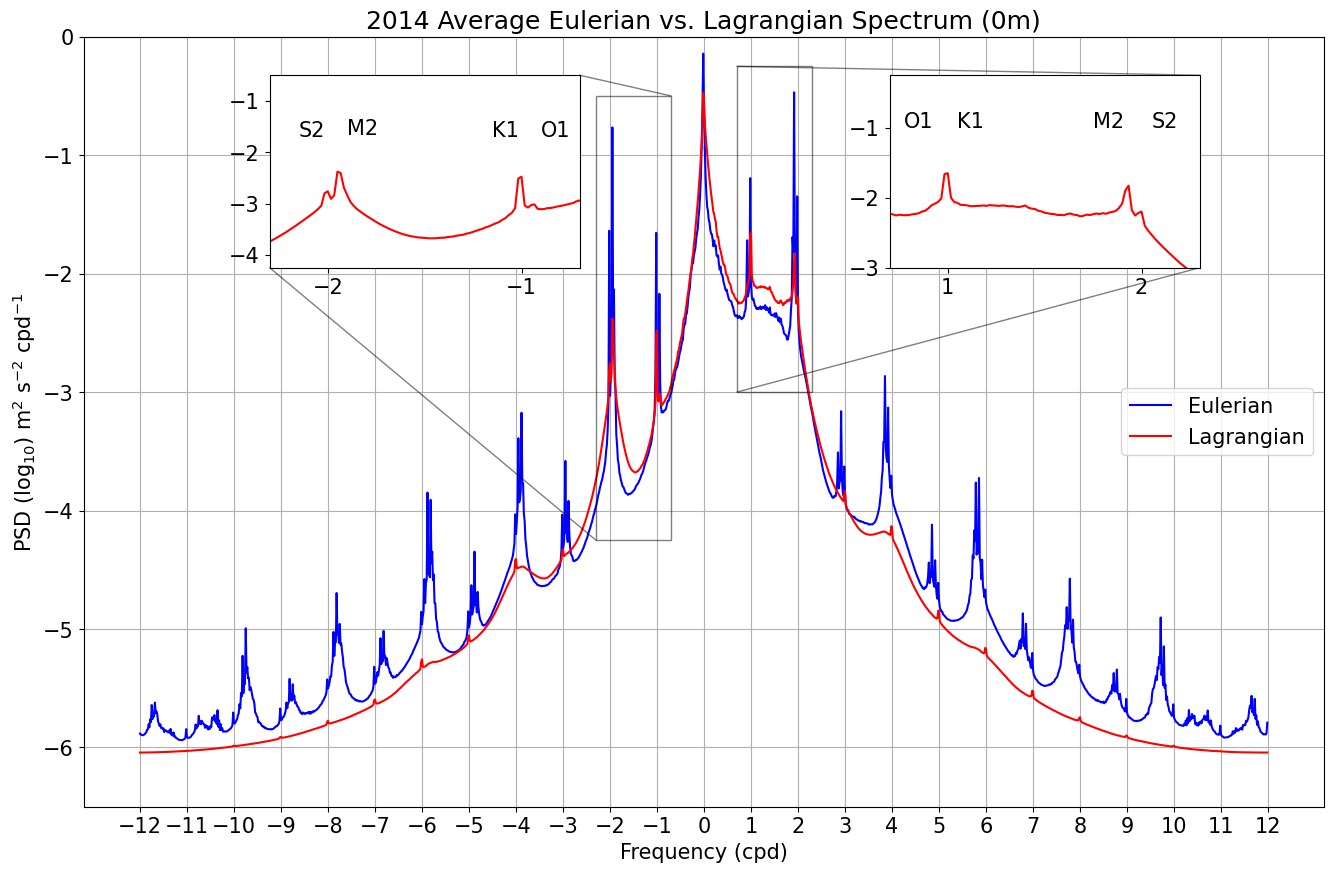

In [26]:
plt.rcParams.update({'font.size': 15, 'font.family': 'sans-serif'})
# variables
dte = 60*60*24
dtl = 1/24
freq_time = (eul_0m.freq_time)
freq_obs = (lag_0m.freq_obs)
# create figure
fig,ax = plt.subplots(figsize=(16,10))
# plot lagrangian and eulerian spectra
plt.plot(freq_time[0:722:1]*dte,np.log10((flipe[0:722:1])), 'b')
plt.plot(freq_time[1440:720:-1]*dte,np.log10((flipe[1440:720:-1])), 'b', label = 'Eulerian')
plt.plot(freq_obs[0:722:1]/dtl,np.log10((lag[0:722:1])), 'r')
plt.plot(freq_obs[1440:720:-1]/dtl,np.log10((lag[1440:720:-1])), 'r', label = 'Lagrangian')
# add grid, ticks, labels, etc.
plt.grid()
plt.xticks(ticks=np.arange(-12,13,1));
ax.set_ylim(-6.5,0)
plt.legend()
plt.title("2014 Average Eulerian vs. Lagrangian Spectrum (0m)")
plt.ylabel('PSD (log$_{10}$) m$^{2}$ s$^{-2}$ cpd$^{-1}$')
plt.xlabel('Frequency (cpd)')
# declare axis for zoom and set limits
axins = ax.inset_axes([0.65, 0.7, .25, .25])
x1, x2, y1, y2 = 2.3, 0.7, -3, -0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([2, 1])
axins.set_yticks([-3, -2, -1])
# plot spectra in zoomed axes
axins.plot(freq_time[0:719:1]*dte,np.log10((flipe[0:719:1])), 'b')
axins.plot(freq_obs[720:1440:1]/dtl,np.log10((lag[720:1440:1])), 'r')
axins.axvline(bo[600], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(2.05, -1, 'S2')
axins.axvline(bo[604], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.75, -1, 'M2')
axins.axvline(bo[660], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.05, -1, 'K1')
axins.axvline(bo[664], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(0.775, -1, 'O1')
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.invert_xaxis()

# declare axis for zoom and set limits
axins1 = ax.inset_axes([0.15, 0.7, .25, .25])
xa, xb, ya, yb = -2.3, -0.7, -4.25, -0.5
axins1.set_xlim(xa, xb)
axins1.set_ylim(ya, yb)
axins1.set_xticks([-2, -1])
axins1.set_yticks([-4, -3, -2 , -1])
# plot spectra in zoomed axis
axins1.plot(freq_time[720:1440:1]*dte,np.log10((flipe[720:1440:1])), 'b')
axins1.plot(freq_obs[0:719:1]/dtl,np.log10((lag[0:719:1])), 'r')
axins1.axvline(bo[776], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-0.9, -1.7, 'O1')
axins1.axvline(bo[780], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.15, -1.7, 'K1')
axins1.axvline(bo[836], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.9, -1.65, 'M2')
axins1.axvline(bo[840], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-2.15, -1.7, 'S2')
ax.indicate_inset_zoom(axins1, edgecolor="black")

#plt.savefig('eul_vs_lag_year_spectrum_0m.pdf')

(<matplotlib.patches.Rectangle at 0x200a59fce510>,
 (<matplotlib.patches.ConnectionPatch at 0x200a59fe1f50>,
  <matplotlib.patches.ConnectionPatch at 0x200a59a0ebd0>))

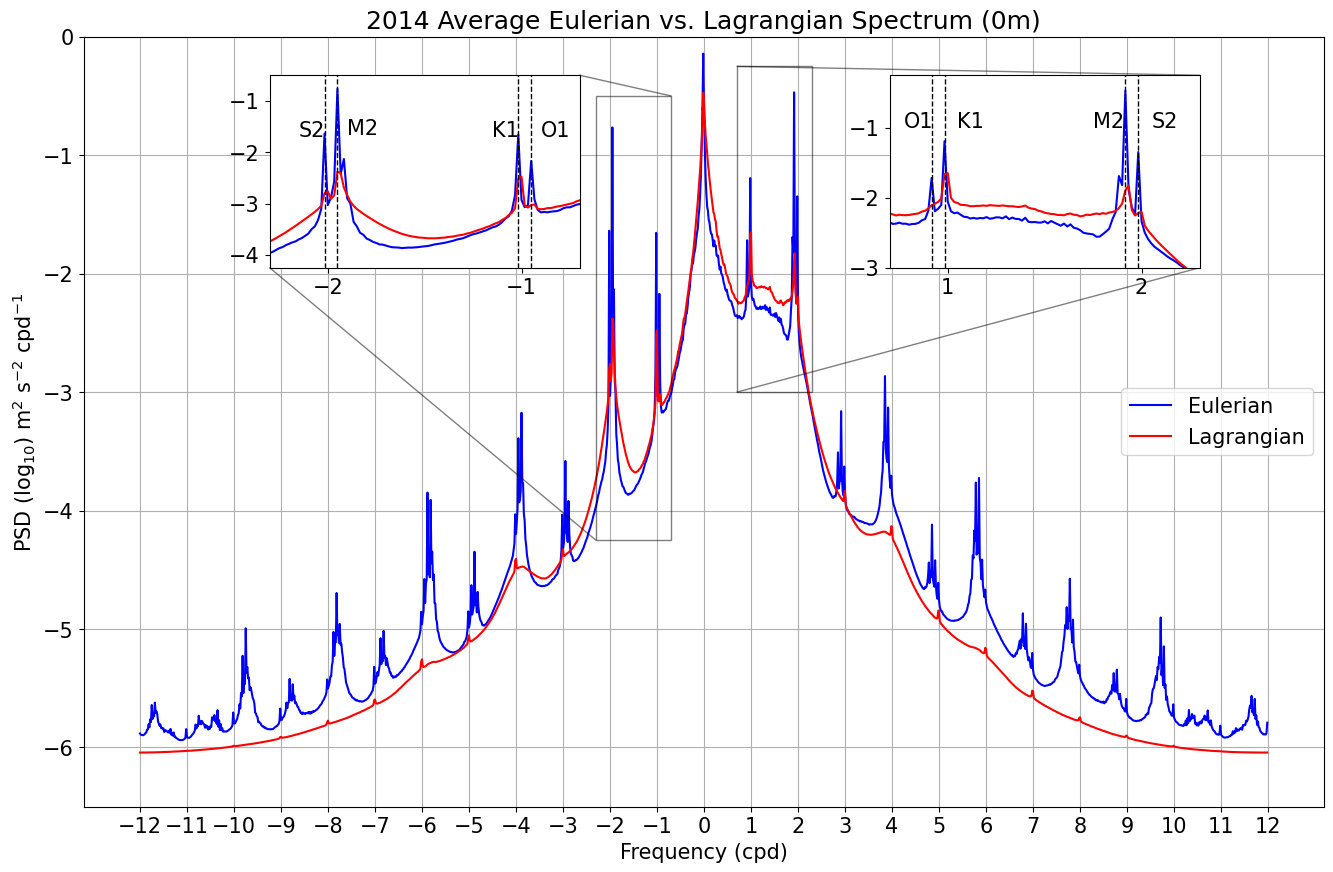

In [36]:
plt.rcParams.update({'font.size': 15, 'font.family': 'sans-serif'})
# declare variables 
dte = 60*60*24
dtl = 1/24
freq_time = (flipe.freq_time)
freq_obs = (lag_0m.freq_obs)
# create figure
fig,ax = plt.subplots(figsize=(16,10))
# plot lagrangian and eulerian spectra
plt.plot(freq_time[0:722:1]*dte,np.log10((eul[0:722:1])), 'b')
plt.plot(freq_time[1440:720:-1]*dte,np.log10((eul[1440:720:-1])), 'b', label = 'Eulerian')
plt.plot(freq_obs[0:722:1]/dtl,np.log10((lag[0:722:1])), 'r')
plt.plot(freq_obs[1440:720:-1]/dtl,np.log10((lag[1440:720:-1])), 'r', label = 'Lagrangian')
# add grid, ticks, labels, etc.
plt.grid()
#plt.legend()
plt.xticks(ticks=np.arange(-12,13,1));
ax.set_ylim(-6.5,0)
plt.legend()
plt.title("2014 Average Eulerian vs. Lagrangian Spectrum (0m)")
plt.ylabel('PSD (log$_{10}$) m$^{2}$ s$^{-2}$ cpd$^{-1}$')
plt.xlabel('Frequency (cpd)')

# declare axis for zoom and set limits
axins = ax.inset_axes([0.65, 0.7, .25, .25])
x1, x2, y1, y2 = 2.3, 0.7, -3, -0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([2, 1])
axins.set_yticks([-3, -2, -1])
# plot spectra in zoomed axis
axins.plot(freq_time[0:719:1]*dte,np.log10((eul[0:719:1])), 'b')
axins.plot(freq_obs[720:1440:1]/dtl,np.log10((lag[720:1440:1])), 'r')
axins.axvline(bo[600], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(2.05, -1, 'S2')
axins.axvline(bo[604], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.75, -1, 'M2')
axins.axvline(bo[660], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.05, -1, 'K1')
axins.axvline(bo[664], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(0.775, -1, 'O1')
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.invert_xaxis()

# declare axis for zoom and set limits
axins1 = ax.inset_axes([0.15, 0.7, .25, .25])
xa, xb, ya, yb = -2.3, -0.7, -4.25, -0.5
axins1.set_xlim(xa, xb)
axins1.set_ylim(ya, yb)
axins1.set_xticks([-2, -1])
axins1.set_yticks([-4, -3, -2 , -1])
# plot spectra in zoomed axis
axins1.plot(freq_time[720:1440:1]*dte,np.log10((eul[720:1440:1])), 'b')
axins1.plot(freq_obs[0:719:1]/dtl,np.log10((lag[0:719:1])), 'r')
axins1.axvline(bo[776], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-0.9, -1.7, 'O1')
axins1.axvline(bo[780], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.15, -1.7, 'K1')
axins1.axvline(bo[836], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.9, -1.65, 'M2')
axins1.axvline(bo[840], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-2.15, -1.7, 'S2')
ax.indicate_inset_zoom(axins1, edgecolor="black")
#plt.savefig('eul_vs_lag_year_spectrum_0m.pdf')

In [29]:
freq_time = (eul_15m.freq_time)
bo = (freq_time*dte).to_numpy()

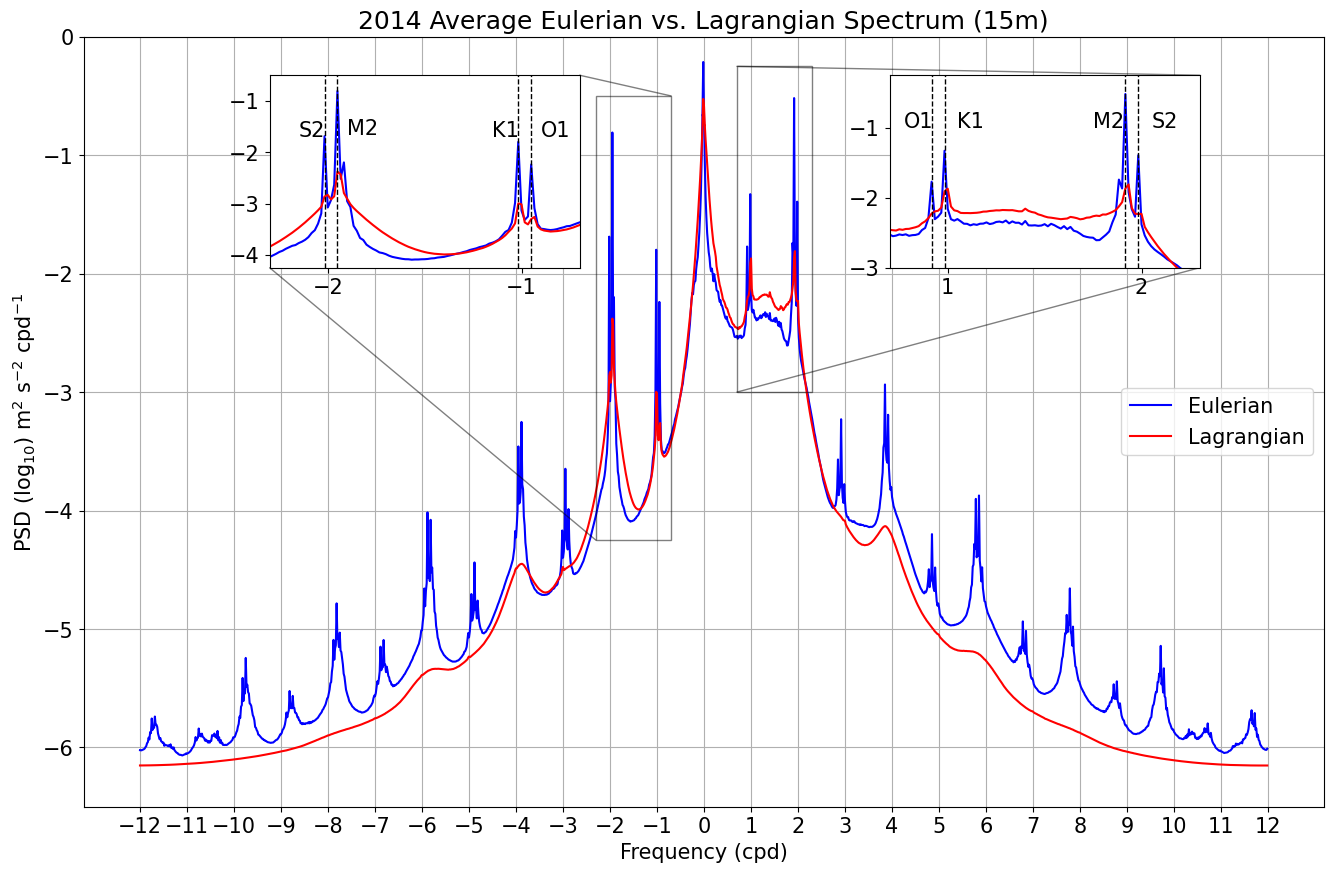

In [32]:
plt.rcParams.update({'font.size': 15, 'font.family': 'sans-serif'})
# repeat above figure at 15 meters depth
dte = 60*60*24
dtl = 1/24
freq_time = (eul_15m.freq_time)
freq_obs = (lag_15m.freq_obs)
fig,ax = plt.subplots(figsize=(16,10))
plt.plot(freq_time[0:722:1]*dte,np.log10((flip15[0:722:1])), 'b')
plt.plot(freq_time[1440:720:-1]*dte,np.log10((flip15[1440:720:-1])), 'b', label = 'Eulerian')
plt.plot(freq_obs[0:722:1]/dtl,np.log10((lag15[0:722:1])), 'r')
plt.plot(freq_obs[1440:720:-1]/dtl,np.log10((lag15[1440:720:-1])), 'r', label = 'Lagrangian')
plt.grid()
#plt.legend()
plt.xticks(ticks=np.arange(-12,13,1));
ax.set_ylim(-6.5,0)
plt.legend()
plt.title("2014 Average Eulerian vs. Lagrangian Spectrum (15m)")
plt.ylabel('PSD (log$_{10}$) m$^{2}$ s$^{-2}$ cpd$^{-1}$')
plt.xlabel('Frequency (cpd)')

axins = ax.inset_axes([0.65, 0.7, .25, .25])
x1, x2, y1, y2 = 2.3, 0.7, -3, -0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([2, 1])
axins.set_yticks([-3, -2, -1])
axins.plot(freq_time[0:719:1]*dte,np.log10((flip15[0:719:1])), 'b')
axins.plot(freq_obs[720:1440:1]/dtl,np.log10((lag15[720:1440:1])), 'r')
axins.axvline(bo[600], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(2.05, -1, 'S2')
axins.axvline(bo[604], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.75, -1, 'M2')
axins.axvline(bo[660], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.05, -1, 'K1')
axins.axvline(bo[664], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(0.775, -1, 'O1')
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.invert_xaxis()


axins1 = ax.inset_axes([0.15, 0.7, .25, .25])
xa, xb, ya, yb = -2.3, -0.7, -4.25, -0.5
axins1.set_xlim(xa, xb)
axins1.set_ylim(ya, yb)
axins1.set_xticks([-2, -1])
axins1.set_yticks([-4, -3, -2 , -1])
axins1.plot(freq_time[720:1440:1]*dte,np.log10((flip15[720:1440:1])), 'b')
axins1.plot(freq_obs[0:719:1]/dtl,np.log10((lag15[0:719:1])), 'r')
axins1.axvline(bo[776], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-0.9, -1.7, 'O1')
axins1.axvline(bo[780], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.15, -1.7, 'K1')
axins1.axvline(bo[836], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.9, -1.65, 'M2')
axins1.axvline(bo[840], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-2.15, -1.7, 'S2')
ax.indicate_inset_zoom(axins1, edgecolor="black")
plt.savefig('eul_vs_lag_year_spectrum_15m.pdf')

In [6]:
# open monthly lagrangian datasets
df0 = {}
df15 = {}
for i in list11:
    df0[int(i)] = xr.open_dataset('/home/exf512/summer/lag_0m_hycom/deep_fast/netcdf/deep_fast_ds_'+
                                 str(int(i))+'.nc', chunks = {'obs':1440})
    df15[int(i)] = xr.open_dataset('/home/exf512/summer/lag_15m_hycom/deep_fast_ds/deep_fast_ds_15m_'+
                                 str(int(i))+'.nc')

In [50]:
df0[1]

<xarray.Dataset>
Dimensions:     (trajectory: 528707, obs: 1440)
Coordinates:
  * obs         (obs) int32 0 1 2 3 4 5 6 ... 1433 1434 1435 1436 1437 1438 1439
  * trajectory  (trajectory) int64 0 1 2 3 4 ... 836577 836578 836579 836580
Data variables:
    depth       (trajectory, obs) float32 ...
    lat         (trajectory, obs) float32 ...
    lon         (trajectory, obs) float32 ...
    mve         (trajectory, obs) float32 ...
    mvn         (trajectory, obs) float32 ...
    ssh         (trajectory, obs) float32 ...
    steric_ssh  (trajectory, obs) float32 ...
    time        (trajectory, obs) float32 ...
    ve          (trajectory, obs) float32 ...
    vn          (trajectory, obs) float32 ...
Attributes:
    feature_type:      trajectory
    parcels_mesh:      spherical
    parcels_versions:  2.4.1.dev9

In [40]:
# open monthly eulerian spectra datasets
eul_spec_0m = {}
eul_spec_15m = {}
for i in list11:
    eul_spec_0m[int(i)] = xr.open_dataset('/projectnb/msldrift/tidaldrift/faigle/eul_spec_0m/avg_eul_spec_'+
                                          str(int(i))+'.nc')
    eul_spec_15m[int(i)] = xr.open_dataset('/projectnb/msldrift/tidaldrift/faigle/eul_spec_15m/avg_eul_spec_15m_'+
                                          str(int(i))+'.nc')

In [44]:
# flip axes
flip = {}
flip15 = {}
for i in list11:
    flip[int(i)] = np.flip(eul_spec_0m[int(i)].spectrum)
    flip15[int(i)] = np.flip(eul_spec_15m[int(i)].spectrum)

In [37]:
# open leagrangian monthly spectra
df_spectra_0m = {}
df_spectra_15m = {}
for i in list11: 
    df_spectra_0m[int(i)] = xr.open_dataset(
        '/home/exf512/data/avg_spectra_deep_fast/0m/avg_spectra_0m_'+
        str(int(i))+'.nc', chunks = {'obs':1440})
    df_spectra_15m[int(i)] = xr.open_dataset(
        '/home/exf512/data/avg_spectra_deep_fast/15m/avg_spectra_15m_'+
        str(int(i))+'.nc', chunks = {'obs':1440}) 

In [ ]:
freq_time = (eul_spec_0m[1].freq_time)
bo = (freq_time*dte).to_numpy()

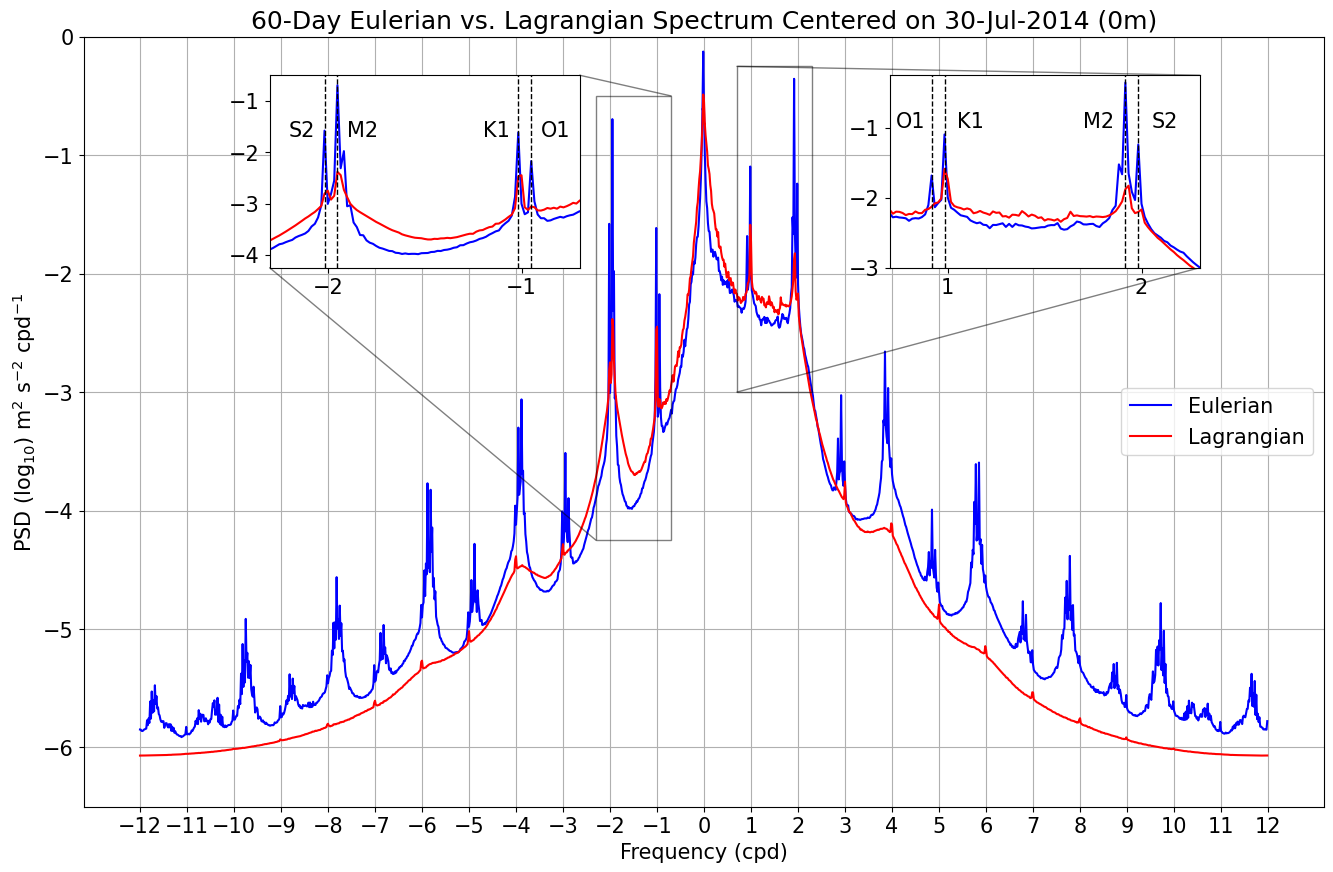

In [19]:
plt.rcParams.update({'font.size': 15, 'font.family': 'sans-serif'})
i = 7
dte = 60*60*24
dtl = 1/24
freq_time = (eul_spec_0m[int(i)].freq_time)
bo = (freq_time*dte).to_numpy()
freq_obs = (df_spectra_0m[int(i)].freq_obs)
fig,ax = plt.subplots(figsize=(16,10))
plt.plot(freq_time[0:722:1]*dte,np.log10((flip[int(i)][0:722:1])), 'b')
plt.plot(freq_time[1440:720:-1]*dte,np.log10((flip[int(i)][1440:720:-1])), 'b', label = 'Eulerian')
plt.plot(freq_obs[0:722:1]/dtl,np.log10((df_spectra_0m[int(i)].spectrum[0:722:1])), 'r')
plt.plot(freq_obs[1440:720:-1]/dtl,np.log10((df_spectra_0m[int(i)].spectrum[1440:720:-1])), 'r', label = 'Lagrangian')
plt.grid()
#plt.legend()
plt.xticks(ticks=np.arange(-12,13,1));
ax.set_ylim(-6.5,0)
plt.legend()
plt.title("60-Day Eulerian vs. Lagrangian Spectrum Centered on 30-Jul-2014 (0m)")
plt.ylabel('PSD (log$_{10}$) m$^{2}$ s$^{-2}$ cpd$^{-1}$')
plt.xlabel('Frequency (cpd)')

axins = ax.inset_axes([0.65, 0.7, .25, .25])
x1, x2, y1, y2 = 2.3, 0.7, -3, -0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([2, 1])
axins.set_yticks([-3, -2, -1])
axins.plot(freq_time[0:719:1]*dte,np.log10((flip[int(i)][0:719:1])), 'b')
axins.plot(freq_obs[720:1440:1]/dtl,np.log10((df_spectra_0m[int(i)].spectrum[720:1440:1])), 'r')
axins.axvline(bo[600], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(2.05, -1, 'S2')
axins.axvline(bo[604], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.7, -1, 'M2')
axins.axvline(bo[660], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.05, -1, 'K1')
axins.axvline(bo[664], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(0.73, -1, 'O1')
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.invert_xaxis()


axins1 = ax.inset_axes([0.15, 0.7, .25, .25])
xa, xb, ya, yb = -2.3, -0.7, -4.25, -0.5
axins1.set_xlim(xa, xb)
axins1.set_ylim(ya, yb)
axins1.set_xticks([-2, -1])
axins1.set_yticks([-4, -3, -2 , -1])
axins1.plot(freq_time[720:1440:1]*dte,np.log10((flip[int(i)][720:1440:1])), 'b')
axins1.plot(freq_obs[0:719:1]/dtl,np.log10((df_spectra_0m[int(i)].spectrum[0:719:1])), 'r')
axins1.axvline(bo[776], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-0.9, -1.7, 'O1')
axins1.axvline(bo[780], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.2, -1.7, 'K1')
axins1.axvline(bo[836], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.9, -1.7, 'M2')
axins1.axvline(bo[840], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-2.2, -1.7, 'S2')
ax.indicate_inset_zoom(axins1, edgecolor="black")
plt.savefig('eul_vs_lag_'+str(int(i))+'_spectrum_0m.pdf', facecolor = 'none')

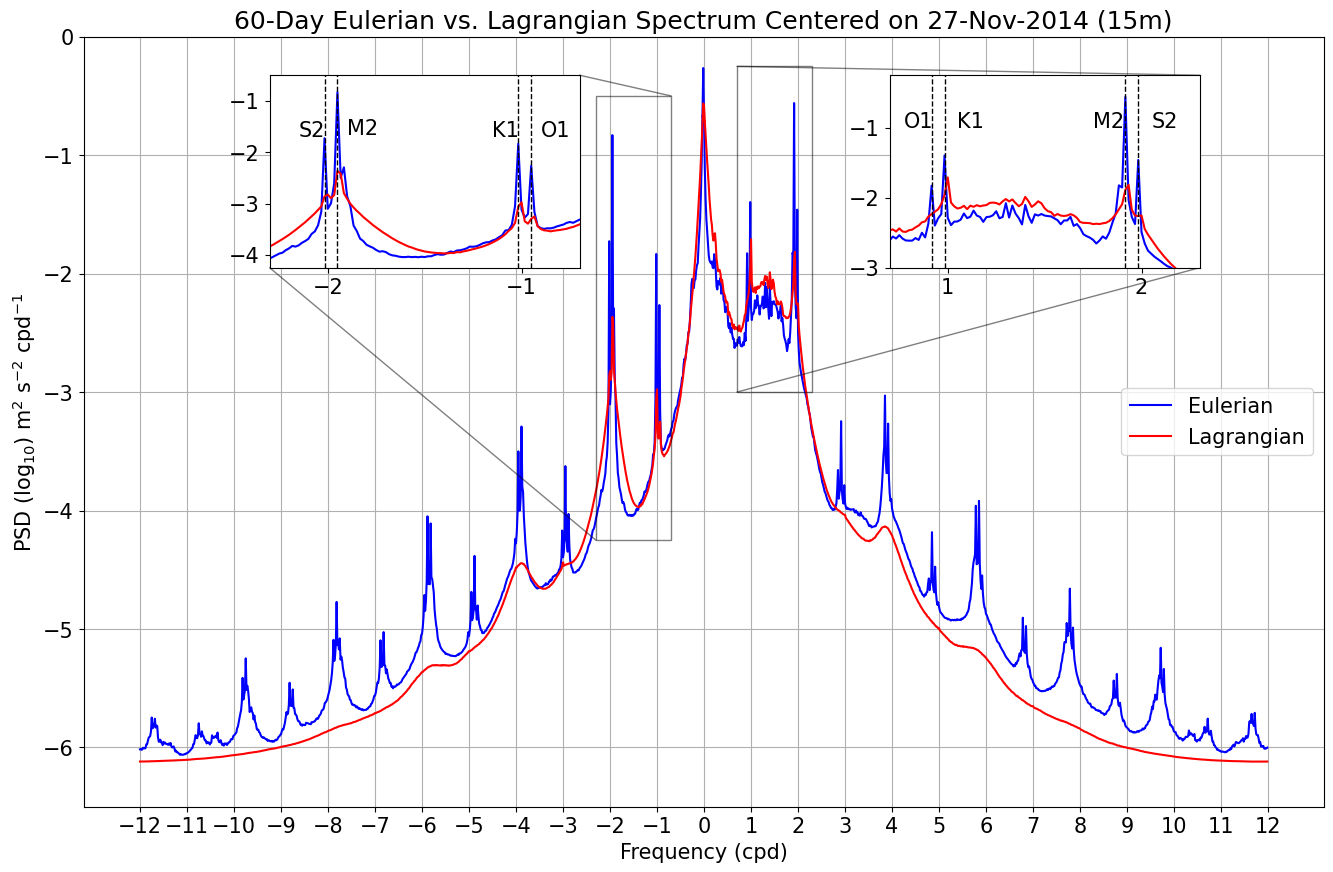

In [45]:
plt.rcParams.update({'font.size': 15, 'font.family': 'sans-serif'})
i = 11
dte = 60*60*24
dtl = 1/24
freq_time = (eul_spec_15m[int(i)].freq_time)
freq_obs = (df_spectra_15m[int(i)].freq_obs)
fig,ax = plt.subplots(figsize=(16,10))
plt.plot(freq_time[0:722:1]*dte,np.log10((flip15[int(i)][0:722:1])), 'b')
plt.plot(freq_time[1440:720:-1]*dte,np.log10((flip15[int(i)][1440:720:-1])), 'b', label = 'Eulerian')
plt.plot(freq_obs[0:722:1]/dtl,np.log10((df_spectra_15m[int(i)].spectrum[0:722:1])), 'r')
plt.plot(freq_obs[1440:720:-1]/dtl,np.log10((df_spectra_15m[int(i)].spectrum[1440:720:-1])), 'r', label = 'Lagrangian')
plt.grid()
#plt.legend()
plt.xticks(ticks=np.arange(-12,13,1));
ax.set_ylim(-6.5,0)
plt.legend()
plt.title("60-Day Eulerian vs. Lagrangian Spectrum Centered on 27-Nov-2014 (15m)")
plt.ylabel('PSD (log$_{10}$) m$^{2}$ s$^{-2}$ cpd$^{-1}$')
plt.xlabel('Frequency (cpd)')

axins = ax.inset_axes([0.65, 0.7, .25, .25])
x1, x2, y1, y2 = 2.3, 0.7, -3, -0.25
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([2, 1])
axins.set_yticks([-3, -2, -1])
axins.plot(freq_time[0:719:1]*dte,np.log10((flip15[int(i)][0:719:1])), 'b')
axins.plot(freq_obs[720:1440:1]/dtl,np.log10((df_spectra_15m[int(i)].spectrum[720:1440:1])), 'r')
axins.axvline(bo[600], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(2.05, -1, 'S2')
axins.axvline(bo[604], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.75, -1, 'M2')
axins.axvline(bo[660], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(1.05, -1, 'K1')
axins.axvline(bo[664], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins.text(0.775, -1, 'O1')
ax.indicate_inset_zoom(axins, edgecolor="black")
axins.invert_xaxis()


axins1 = ax.inset_axes([0.15, 0.7, .25, .25])
xa, xb, ya, yb = -2.3, -0.7, -4.25, -0.5
axins1.set_xlim(xa, xb)
axins1.set_ylim(ya, yb)
axins1.set_xticks([-2, -1])
axins1.set_yticks([-4, -3, -2 , -1])
axins1.plot(freq_time[720:1440:1]*dte,np.log10((flip15[int(i)][720:1440:1])), 'b')
axins1.plot(freq_obs[0:719:1]/dtl,np.log10((df_spectra_15m[int(i)].spectrum[0:719:1])), 'r')
axins1.axvline(bo[776], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-0.9, -1.7, 'O1')
axins1.axvline(bo[780], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.15, -1.7, 'K1')
axins1.axvline(bo[836], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-1.9, -1.65, 'M2')
axins1.axvline(bo[840], ls = '--', color = 'k', lw = 1)  # to add vertical line
axins1.text(-2.15, -1.7, 'S2')
ax.indicate_inset_zoom(axins1, edgecolor="black")
plt.savefig('eul_vs_lag_'+str(int(i))+'_spectrum_15m.pdf')